# MEG II 2024 vs Paper-Era: The Constraint Tightening

Visualizes how the 100× improvement in μ→eγ bound changed RS5D phenomenology.

Loaded 465,125 points
Paper-era: 6,098, MEG II: 1,222
Shrinkage: 5.0×



Saved: meg2_comparison.png & .pdf


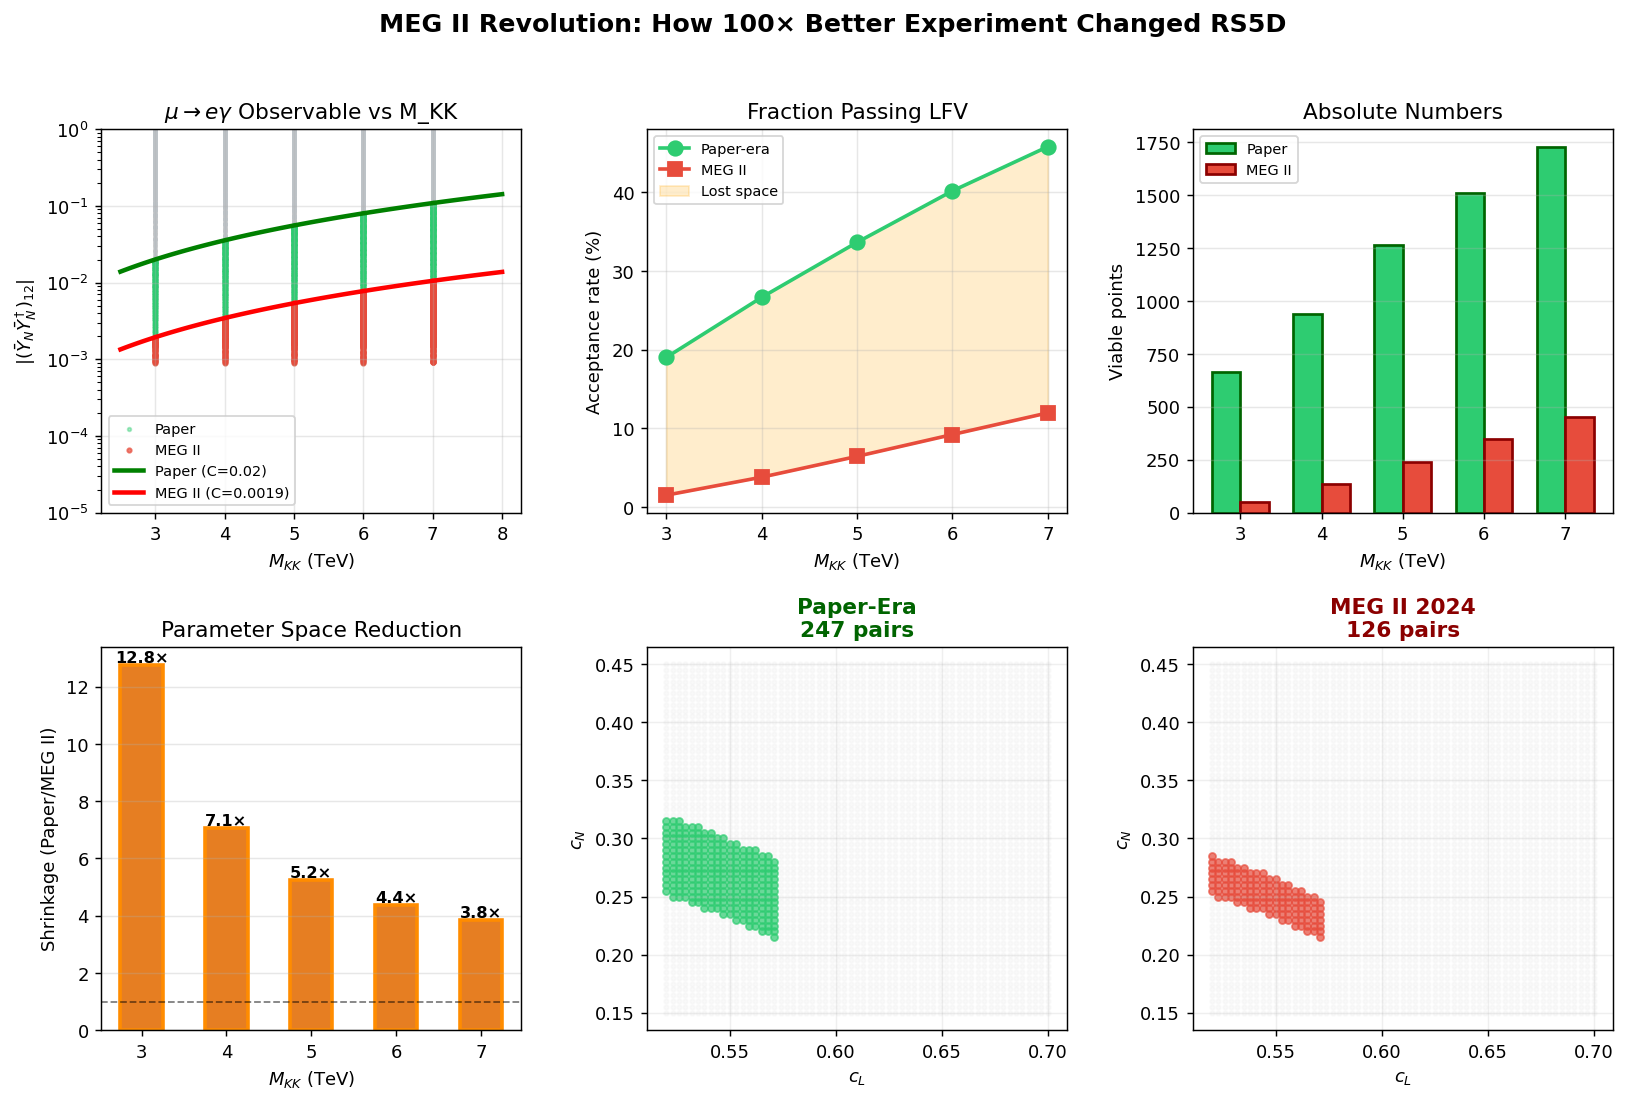


CONSTRAINT EVOLUTION SUMMARY
BR limit:  MEGA 2008 = 1.2e-11 → MEG II = 1.5e-13 (100× better)
Effective C:  0.020 → 0.001936 (10.3× tighter)

Viable points: 6,098 → 1,222 (5.0× reduction)

At M_KK = 3 TeV: 663 → 52 (12.8× shrinkage!)
At M_KK = 7 TeV: 1724 → 450 (3.8× shrinkage)

→ Perez & Randall were RIGHT with MEGA 2008 bound
→ MEG II 2024 requires M_KK ≥ 10-15 TeV for similar viability


In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Style
plt.rcParams.update({'figure.dpi': 130, 'font.size': 10})

# Load data
files = sorted(glob.glob('scan_outputs/scan_shard_*_of_016.csv'))
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# LFV constants
C_MEGII = np.sqrt(1.5e-13 / 4e-8)
C_PAPER = 0.02

# Compute paper-era LFV
df['lfv_ratio_paper'] = df['lfv_ratio'] * (C_MEGII / C_PAPER)
df['lfv_passes_paper'] = df['lfv_ratio_paper'] <= 1.0
df['passes_paper_era'] = df['perturbative'] & df['natural'] & df['lfv_passes_paper']

# Subsets
df_pn = df[df.perturbative & df.natural]
df_paper = df[df.passes_paper_era]
df_megii = df[df.passes_all]

print(f"Loaded {len(df):,} points")
print(f"Paper-era: {len(df_paper):,}, MEG II: {len(df_megii):,}")
print(f"Shrinkage: {len(df_paper)/len(df_megii):.1f}×")

#=== CREATE FIGURE ===#
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.subplots_adjust(hspace=0.35, wspace=0.3)

#--- Panel 1: LFV observable vs M_KK ---#
ax = axes[0, 0]
ax.scatter(df_pn['Lambda_IR']/1000, df_pn['lfv_lhs'], c='#bdc3c7', s=1, alpha=0.1, rasterized=True)
ax.scatter(df_paper['Lambda_IR']/1000, df_paper['lfv_lhs'], c='#2ecc71', s=4, alpha=0.4, rasterized=True, label='Paper')
ax.scatter(df_megii['Lambda_IR']/1000, df_megii['lfv_lhs'], c='#e74c3c', s=6, alpha=0.7, rasterized=True, label='MEG II')

mkk = np.linspace(2.5, 8, 100)
ax.plot(mkk, C_PAPER * (mkk*1000/3000)**2, 'g-', lw=2.5, label=f'Paper (C={C_PAPER})')
ax.plot(mkk, C_MEGII * (mkk*1000/3000)**2, 'r-', lw=2.5, label=f'MEG II (C={C_MEGII:.4f})')

ax.set_yscale('log')
ax.set_xlabel(r'$M_{KK}$ (TeV)')
ax.set_ylabel(r'$|(\bar{Y}_N \bar{Y}_N^\dagger)_{12}|$')
ax.set_title(r'$\mu\to e\gamma$ Observable vs M_KK')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_ylim(1e-5, 1)

#--- Panel 2: Acceptance rate ---#
ax = axes[0, 1]
lam_vals = sorted(df['Lambda_IR'].unique())
acc_p, acc_m, n_p, n_m = [], [], [], []
for lam in lam_vals:
    pn = df_pn[df_pn['Lambda_IR']==lam]
    p = df_paper[df_paper['Lambda_IR']==lam]
    m = df_megii[df_megii['Lambda_IR']==lam]
    if len(pn) > 0:
        acc_p.append(100*len(p)/len(pn))
        acc_m.append(100*len(m)/len(pn))
        n_p.append(len(p))
        n_m.append(len(m))

lam_tev = [l/1000 for l in lam_vals]
ax.plot(lam_tev, acc_p, 'o-', c='#2ecc71', lw=2, ms=8, label='Paper-era')
ax.plot(lam_tev, acc_m, 's-', c='#e74c3c', lw=2, ms=8, label='MEG II')
ax.fill_between(lam_tev, acc_p, acc_m, color='orange', alpha=0.2, label='Lost space')
ax.set_xlabel(r'$M_{KK}$ (TeV)')
ax.set_ylabel('Acceptance rate (%)')
ax.set_title('Fraction Passing LFV')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

#--- Panel 3: Absolute numbers ---#
ax = axes[0, 2]
x = np.arange(len(lam_vals))
w = 0.35
ax.bar(x-w/2, n_p, w, label='Paper', color='#2ecc71', edgecolor='darkgreen', lw=1.5)
ax.bar(x+w/2, n_m, w, label='MEG II', color='#e74c3c', edgecolor='darkred', lw=1.5)
ax.set_xticks(x)
ax.set_xticklabels([f'{t:.0f}' for t in lam_tev])
ax.set_xlabel(r'$M_{KK}$ (TeV)')
ax.set_ylabel('Viable points')
ax.set_title('Absolute Numbers')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3, axis='y')

#--- Panel 4: Shrinkage factor ---#
ax = axes[1, 0]
shr = np.array(n_p) / np.array(n_m)
ax.bar(lam_tev, shr, color='#e67e22', edgecolor='darkorange', lw=2, width=0.5)
for x, y in zip(lam_tev, shr):
    ax.text(x, y, f'{y:.1f}×', ha='center', va='bottom', fontsize=9, weight='bold')
ax.axhline(1, color='k', ls='--', lw=1, alpha=0.5)
ax.set_xlabel(r'$M_{KK}$ (TeV)')
ax.set_ylabel('Shrinkage (Paper/MEG II)')
ax.set_title('Parameter Space Reduction')
ax.grid(True, alpha=0.3, axis='y')

#--- Panel 5 & 6: (c_L, c_N) space ---#
agg = df.groupby(['c_L','c_N']).agg(p=('passes_paper_era','any'), m=('passes_all','any')).reset_index()

ax = axes[1, 1]
mask_p = agg['p']
ax.scatter(agg['c_L'], agg['c_N'], c='#eee', s=6, alpha=0.3, rasterized=True)
ax.scatter(agg['c_L'][mask_p], agg['c_N'][mask_p], c='#2ecc71', s=15, alpha=0.7, rasterized=True)
ax.set_xlabel('$c_L$')
ax.set_ylabel('$c_N$')
ax.set_title(f'Paper-Era\n{mask_p.sum()} pairs', color='darkgreen', weight='bold')
ax.grid(True, alpha=0.2)

ax = axes[1, 2]
mask_m = agg['m']
ax.scatter(agg['c_L'], agg['c_N'], c='#eee', s=6, alpha=0.3, rasterized=True)
ax.scatter(agg['c_L'][mask_m], agg['c_N'][mask_m], c='#e74c3c', s=15, alpha=0.7, rasterized=True)
ax.set_xlabel('$c_L$')
ax.set_ylabel('$c_N$')
ax.set_title(f'MEG II 2024\n{mask_m.sum()} pairs', color='darkred', weight='bold')
ax.grid(True, alpha=0.2)

fig.suptitle('MEG II Revolution: How 100× Better Experiment Changed RS5D',
             fontsize=14, weight='bold')

plt.savefig('meg2_comparison.png', dpi=150, bbox_inches='tight')
plt.savefig('meg2_comparison.pdf', bbox_inches='tight')
print("\nSaved: meg2_comparison.png & .pdf")
plt.show()

# Summary
print(f"\n{'='*50}")
print("CONSTRAINT EVOLUTION SUMMARY")
print(f"{'='*50}")
print(f"BR limit:  MEGA 2008 = 1.2e-11 → MEG II = 1.5e-13 (100× better)")
print(f"Effective C:  {C_PAPER:.3f} → {C_MEGII:.6f} ({C_PAPER/C_MEGII:.1f}× tighter)")
print(f"\nViable points: {len(df_paper):,} → {len(df_megii):,} ({len(df_paper)/len(df_megii):.1f}× reduction)")
print(f"\nAt M_KK = 3 TeV: {n_p[0]} → {n_m[0]} ({shr[0]:.1f}× shrinkage!)")
print(f"At M_KK = 7 TeV: {n_p[4]} → {n_m[4]} ({shr[4]:.1f}× shrinkage)")
print(f"\n→ Perez & Randall were RIGHT with MEGA 2008 bound")
print(f"→ MEG II 2024 requires M_KK ≥ 10-15 TeV for similar viability")
print(f"{'='*50}")